In [20]:
%run "C:\Users\AM3855\Desktop\FeatEngineering_FeatSelection.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds              

In [21]:
# CHECKING FINAL DATA PREPARED FOR TRAINING

x_prepared.head()

,MaxOfUpperTRange,fruitset,BumblesBeeDominance,andrena,seeds,osmia,AverageOfLowerTRange,honeybee,new_4,clonesize
0,0.233109,2.0,0.430537,0.119563,2.0,0.307345,0.233109,0.512264,1.078553,0.539277
1,0.233109,2.0,0.394019,0.272418,3.0,0.307345,0.233109,0.512264,1.078553,0.539277
2,0.274707,7.0,0.418407,0.198967,6.0,0.311531,0.274707,0.476486,3.075348,0.439335
3,0.247760,8.0,0.419442,0.198967,7.0,0.307345,0.247694,0.476486,3.514684,0.439335
4,0.247760,8.0,0.409769,0.198967,8.0,0.311531,0.247694,0.512264,4.314213,0.539277


In [22]:
# SPLITTING THE DATA INTO 80% TRAINING DATA AND 20% TESTING DATA

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_prepared,y,test_size = 0.2)

In [23]:
# CHECKING AND RECONFRIMING SHAPES OF VARIABLES

print(x_test.shape)
print(y_train.shape)

(3058, 10)
(12231,)


FITTING AN XGBOOST MODEL

In [24]:
# INSTALLING PACKAGE TO IMPLEMENT XGBOOST ALGORITHM

%pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
# FITTING AN XGBOOST MODEL

from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [26]:
# MAKING PREDICTION WITH THE XGBOOST MODEL

xgb_pred = xgb_reg.predict(x_test)

FITTING A LIGHTGBM MODEL

In [27]:
# INSTALLING PACKAGE TO IMPLEMENT LIGHTGBM ALGORITHM

%pip install lightgbm


     ---------------------------------------- 1.0/1.0 MB 1.7 MB/s eta 0:00:00


In [29]:
# FITTING A LIGHTGBM MODEL

import lightgbm as lgb
lgbm = lgb.LGBMRegressor(objective='regression', num_leaves=30, learning_rate=0.1, n_estimators=100)
lgbm.fit(x_train, y_train)

LGBMRegressor(num_leaves=30, objective='regression')

In [30]:
# MAKING PREDICTIONS WITH LIGHTGBM MODEL

lgbm_pred = lgbm.predict(x_test)

FITTING A CATBOOST MODEL

In [31]:
# INSTALLING PACKAGE TO IMPLEMENT CATBOOST ALGORITHM

%pip install catboost

     -------------------------------------- 101.0/101.0 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:
# FITTING A CATBOOSTING MODEL

from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(iterations=500, learning_rate=0.05,  loss_function='MAE', random_seed=42)
catboost_model.fit(x_train, y_train, eval_set=(x_test, y_test), early_stopping_rounds=100)

0:	learn: 1011.2245567	test: 1000.0436668	best: 1000.0436668 (0)	total: 139ms	remaining: 1m 9s
1:	learn: 971.1415550	test: 960.4335113	best: 960.4335113 (1)	total: 142ms	remaining: 35.4s
2:	learn: 934.9148947	test: 923.9928272	best: 923.9928272 (2)	total: 145ms	remaining: 24s
3:	learn: 899.0777460	test: 888.5322103	best: 888.5322103 (3)	total: 148ms	remaining: 18.3s
4:	learn: 869.2672409	test: 858.7889689	best: 858.7889689 (4)	total: 151ms	remaining: 14.9s
5:	learn: 838.1650763	test: 827.7650263	best: 827.7650263 (5)	total: 154ms	remaining: 12.7s
6:	learn: 807.0126872	test: 796.6820396	best: 796.6820396 (6)	total: 157ms	remaining: 11s
7:	learn: 780.1572821	test: 769.9854273	best: 769.9854273 (7)	total: 159ms	remaining: 9.81s
8:	learn: 754.4833155	test: 744.5681137	best: 744.5681137 (8)	total: 162ms	remaining: 8.85s
9:	learn: 728.9412523	test: 719.1736740	best: 719.1736740 (9)	total: 165ms	remaining: 8.08s
10:	learn: 704.8077120	test: 695.4404089	best: 695.4404089 (10)	total: 169ms	rema

In [35]:
# PREDICTING USING CATBOOST MODEL

catboost_predictions = catboost_model.predict(x_test)

CREATING AN ENSEMBLE OF THE 3 MODELS

In [36]:
# CREATING AN ENSEMBLE OF PREDICTIONS

ensemble_preds = (xgb_pred + lgbm_pred + catboost_predictions) / 3

EVALUATING THE MODELS

In [38]:
# IMPORTING NECESSARY LIBRARIES

from sklearn.metrics import mean_absolute_error, mean_squared_error

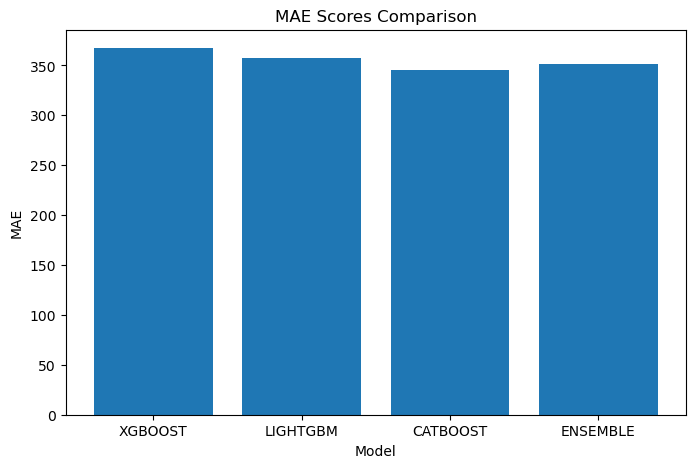

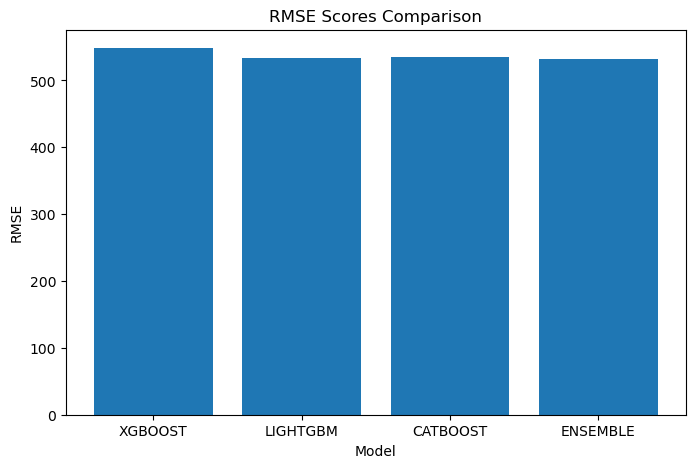

MAE of XGBOOST is 367.38
RMSE of XGBOOST is 548.45


MAE of LIGHTGBM is 357.82
RMSE of LIGHTGBM is 533.54


MAE of CATBOOST is 345.38
RMSE of CATBOOST is 534.51


MAE of ENSEMBLE is 351.42
RMSE of ENSEMBLE is 531.84




([367.3769609806757,
  357.82371217939647,
  345.37824424741757,
  351.4158500822679],
 [548.4545878943358, 533.5380756295244, 534.5139017325296, 531.8384551467703])

In [60]:
# CREATING FUNCTION TO CALC MAE, RMSE AND COMPARE MODELS USING BAR CHARTS

def evaluate_and_visualize(models, y_true, predictions):
    mae_scores = []
    rmse_scores = []
    
    for model, y_pred in zip(models, predictions):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        
    plt.figure(figsize=(8, 5))
    plt.bar(models, mae_scores)
    plt.xlabel('Model')
    plt.ylabel('MAE')
    plt.title('MAE Scores Comparison')
    plt.show()
    
    plt.figure(figsize=(8, 5))
    plt.bar(models, rmse_scores)
    plt.xlabel('Model')
    plt.ylabel('RMSE')
    plt.title('RMSE Scores Comparison')
    plt.show()
    
    for model, mae, rmse in zip(models, mae_scores, rmse_scores):
        print(f"MAE of {model} is {mae:.2f}")
        print(f"RMSE of {model} is {rmse:.2f}")
        print('\n')
    
    return mae_scores, rmse_scores

models = ["XGBOOST","LIGHTGBM","CATBOOST","ENSEMBLE"]
predictions = [xgb_pred, lgbm_pred, catboost_predictions, ensemble_preds]
evaluate_and_visualize(models, y_test, predictions)